In [15]:
import pandas as pd

CDFS = pd.read_csv('./DATA/ZFOURGE/CDFS/CDFS_MAIN3.csv', index_col='Seq')
COSMOS = pd.read_csv('./DATA/ZFOURGE/COSMOS/COSMOS_MAIN3.csv', index_col='Seq')
UDS = pd.read_csv('./DATA/ZFOURGE/UDS/UDS_MAIN3.csv', index_col='Seq')

In [16]:
oCDFS = pd.read_csv('./DATA/Ollie Data/CDFS/results.txt', delim_whitespace=True, index_col='id')
oCOSMOS = pd.read_csv('./DATA/Ollie Data/COSMOS/results.txt', delim_whitespace=True, index_col='id')
oUDS = pd.read_csv('./DATA/Ollie Data/UDS/results.txt', delim_whitespace=True, index_col='id')

c:\Users\danie\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


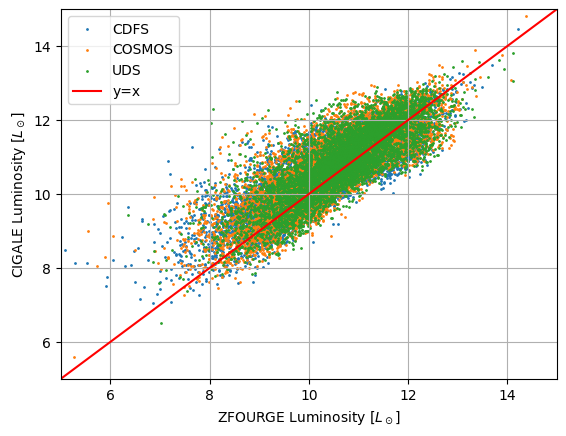

In [18]:
# df = pd.concat([CDFS, COSMOS, UDS], ignore_index=True)
# odf = pd.concat([oCDFS, oCOSMOS, oUDS], ignore_index=True)

# print(len(df), len(odf))

def mask_data(zfourge, cigale):
    
    use_mask = zfourge['Use'] == 1
    zfourge = zfourge.loc[use_mask]
    cigale = cigale.loc[use_mask]

    common_values = zfourge.index.intersection(cigale.index)
    zfourge_clean = zfourge.loc[common_values]
    cigale_clean = cigale.loc[common_values]
    return zfourge_clean, cigale_clean

def get_total_lum(zfourge, cigale):
    zfourge_lum = zfourge['LIR']
    cigale_lum = (cigale['bayes.agn.luminosity'] + cigale['bayes.stellar.lum'] + cigale['bayes.dust.luminosity'])/(3.83*10**26)
    return zfourge_lum, cigale_lum

CDFS, oCDFS = mask_data(CDFS, oCDFS)
COSMOS, oCOSMOS = mask_data(COSMOS, oCOSMOS)
UDS, oUDS = mask_data(UDS, oUDS)

CDFS_lum, oCDFS_lum = get_total_lum(CDFS, oCDFS)
COSMOS_lum, oCOSMOS_lum = get_total_lum(COSMOS, oCOSMOS)
UDS_lum, oUDS_lum = get_total_lum(UDS, oUDS)

# df, odf = mask_data(df, odf)
# df_lum, odf_lum = get_total_lum(df, odf)
# plt.scatter(np.log10(df_lum), np.log10(odf_lum), s=1)

import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(5, 15, 1000)

plt.scatter(np.log10(CDFS_lum), np.log10(oCDFS_lum), label='CDFS', s=1)
plt.scatter(np.log10(COSMOS_lum), np.log10(oCOSMOS_lum), label='COSMOS', s=1)
plt.scatter(np.log10(UDS_lum), np.log10(oUDS_lum), label='UDS', s=1)
plt.plot(x, x, label='y=x', color='red')
plt.legend()
plt.grid()
plt.xlim(5, 15)
plt.ylim(5, 15)
plt.xlabel('ZFOURGE Luminosity [$L_\odot$]')
plt.ylabel('CIGALE Luminosity [$L_\odot$]')
plt.show()